# Cost Function and Gradient Descent

In [ ]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

## Problem Statement

You would like a model which can predict housing prices given the size of the house.  
Let's use the following data


| Size (1000 sqft)     | Price (INR in Lakhs) |
| -------------------| ------------------------ |
| 1                 | 30                      |
| 2                  | 50                      |
| 3                  | 68                      |
| 4                  | 75                      |
| 5                  | 100                      |

In [ ]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])           #(size in 1000s square feet)
y_train = np.array([30.0, 50.0, 68.0, 75.0, 100.0])           #(price in INR lakhs)

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(θ_0, θ_1) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (h(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$h(x^{(i)}) = θ_0 + θ_1x^{(i)} \tag{2}$$
  
- $h(x^{(i)})$ is our prediction for example $i$ using parameters $θ_0, θ_1$.  
- $(h(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(θ_0, θ_1)$. This cost is mean squared error (MSE). Dividing by m and 2m is the same. 2m just yields smaller numbers for easier computations.

- Sometimes, $θ_0$ is also referred as Bias(b) and $θ_1$ onwards as Weights(w). We will use b, w in following sections.


The code below calculates cost by looping over each example. In each loop:
- `h_x`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [ ]:
def compute_cost(x, y, b, w):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      b, w (scalar)    : theta_0 and theta_1, model parameters

    Returns
        total_cost (float): The cost of using theta_0, theta_1 as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0

    for i in range(m):
        # Calculate h(x) and then calculate the cost from y
        # YOUR CODE HERE (find h_x then use it to find cost):
        h_x = b + w * x[i]
        cost = (h_x - y[i]) ** 2


        #####################################################
        cost_sum = cost_sum + cost

    total_cost = (1 / (2*m)) * cost_sum

    return total_cost

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $h(x^{(i)})$:
$$h(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $h(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (h(x^{(i)}) - y^{(i)})^2\tag{2}$$


`Gradient descent` is as follows:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
To make it easier for you, the paritial derivatives are calculated:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (h(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (h(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaneously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` has been implemented using equation (4) and (5) above
- `compute_cost` implementing equation (2) above, which you have completed
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


### First implement compute_gradient

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        h_x = w * x[i] + b
        dj_dw_i = (h_x - y[i]) * x[i]
        dj_db_i = h_x - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

<a name="toc_40291_2.5"></a>
###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)  #  YOUR CODE HERE

        # Update Parameters using equation (3) above
        # YOUR CODE HERE (2 steps)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J and parameters at each iteration
        if i<100000:      # prevent resource exhaustion
            # YOUR CODE HERE (2 steps). Hint: append the values
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.08e+03  dj_dw: -2.268e+02, dj_db: -6.460e+01   w:  2.268e+00, b: 6.46000e-01
Iteration 1000: Cost 4.59e+01  dj_dw:  8.433e-02, dj_db: -3.045e-01   w:  1.700e+01, b: 1.33020e+01
Iteration 2000: Cost 1.59e+01  dj_dw:  1.553e-02, dj_db: -5.607e-02   w:  1.659e+01, b: 1.47689e+01
Iteration 3000: Cost 1.26e+01  dj_dw:  2.860e-03, dj_db: -1.033e-02   w:  1.652e+01, b: 1.50390e+01
Iteration 4000: Cost 1.21e+01  dj_dw:  5.268e-04, dj_db: -1.902e-03   w:  1.650e+01, b: 1.50888e+01
Iteration 5000: Cost 1.20e+01  dj_dw:  9.702e-05, dj_db: -3.503e-04   w:  1.650e+01, b: 1.50979e+01
Iteration 6000: Cost 1.20e+01  dj_dw:  1.787e-05, dj_db: -6.451e-05   w:  1.650e+01, b: 1.50996e+01
Iteration 7000: Cost 1.20e+01  dj_dw:  3.291e-06, dj_db: -1.188e-05   w:  1.650e+01, b: 1.50999e+01
Iteration 8000: Cost 1.20e+01  dj_dw:  6.060e-07, dj_db: -2.188e-06   w:  1.650e+01, b: 1.51000e+01
Iteration 9000: Cost 1.20e+01  dj_dw:  1.116e-07, dj_db: -4.029e-07   w:  1.650e+01, b: 1.51000e+01


### Cost versus iterations of gradient descent
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

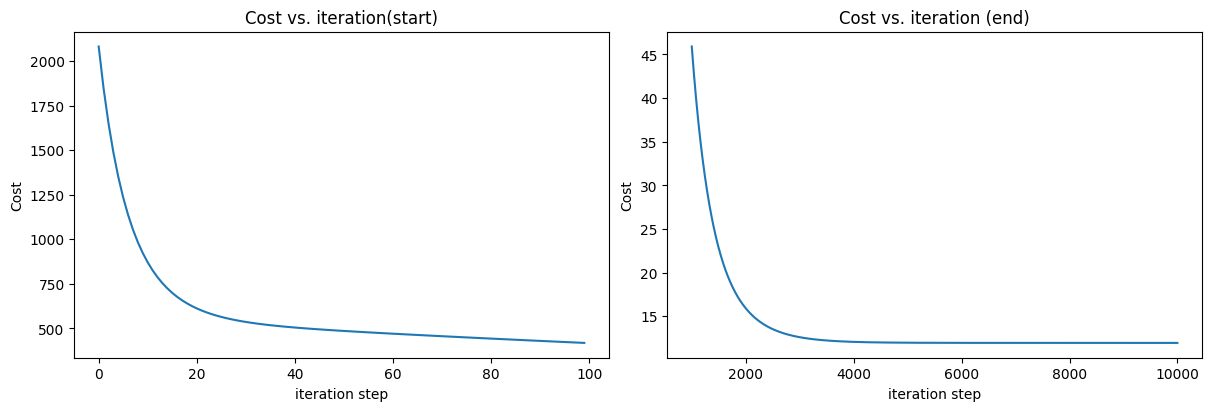

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. You will notice the predicted values are nearly the same as the training values for the same housing, and predictions for newer values also are inline with the training data.

In [ ]:
# Use the hypothesis equation and parameters obtained. Get predictions for 1000 sqft, 2000sqft and 1750 sqft.
# Note: your model is trained on per thousand data, so 1 = 1000

# YOUR CODE HERE:



print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand INR")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand INR")
print(f"1750 sqft house prediction {w_final*1.75 + b_final:0.1f} Thousand INR")



# Expected (approx):
# For 1000 = 31.6 Thousand INR
# For 2000 = 48.1 Thousand INR
# For 1750 = 44.0 Thousand INR

1000 sqft house prediction 31.6 Thousand INR
1200 sqft house prediction 34.9 Thousand INR
2000 sqft house prediction 48.1 Thousand INR
